Importing Libraries

In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Load and Inspect the Data

In [4]:
# Cell 2: Load the dataset and inspect the first few rows
file_path = './annual-number-of-deaths-by-cause.csv'
df = pd.read_csv(file_path)
df.head()


,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


Data Cleaning: Handling Missing Values

In [7]:
# Cell 3: Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' here if needed
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# For categorical columns, we will use 'most_frequent' strategy or fill with a placeholder
imputer_cat = SimpleImputer(strategy='most_frequent')
df_categorical_imputed = pd.DataFrame(imputer_cat.fit_transform(df[categorical_cols]), columns=categorical_cols)

# Combine the numeric and categorical columns back into one DataFrame
df_cleaned = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)

# Check if any missing values remain
df_cleaned.isnull().sum()


Year                                                                                        0
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    0
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     0
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                0
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       0
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      0
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        0
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)                                      0
Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)                            0
Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)                                  0
Deaths - Road injuries - Sex: Both - Age: All Ages (Number) 

Feature Engineering: Calculate Mortality Rate

In [9]:
# Cell 4: Create a new feature - Total Number of Deaths (sum of all death-related columns)
death_columns = [
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
    'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
    'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
    'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
    'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
    'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
    'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
    'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)',
    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
    'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
    'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
    'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)',
    'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
    'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)',
    'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
    'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Alzheimer\'s disease and other dementias - Sex: Both - Age: All Ages (Number)',
    'Deaths - Parkinson\'s disease - Sex: Both - Age: All Ages (Number)'
]

# Sum the deaths across all columns
df_cleaned['Total Number of Deaths'] = df_cleaned[death_columns].sum(axis=1)

# Assuming a constant population for now (since Population column is missing)
# You can update this with actual population data if available
df_cleaned['Population'] = 1_000_000  # Assuming population of 1 million for demonstration

# Calculate Mortality Rate per 100,000 people
df_cleaned['Mortality Rate'] = (df_cleaned['Total Number of Deaths'] / df_cleaned['Population']) * 100000

# Check the new feature
df_cleaned[['Total Number of Deaths', 'Population', 'Mortality Rate']].head()


,Total Number of Deaths,Population,Mortality Rate
0,203598.0,1000000,20359.8
1,199117.0,1000000,19911.7
2,194862.0,1000000,19486.2
3,195034.0,1000000,19503.4
4,196842.0,1000000,19684.2


Normalization and Scaling

In [ ]:
# Separate numerical, categorical, and integer-specific columns
numerical_columns = df_cleaned.select_dtypes(include=['float64']).columns
integer_columns = ['Number of executions (Amnesty International)']
categorical_columns = ['Entity', 'Code']

# Check which columns are being handled
print(f"Numerical columns: {numerical_columns}")
print(f"Integer columns (to remain unchanged): {integer_columns}")
print(f"Categorical columns: {categorical_columns}")

# Scale only the float numerical columns (excluding integer columns)
scaler = StandardScaler()  # Or MinMaxScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns=numerical_columns)

# Combine scaled numerical data with untouched integer and categorical data
df_final = pd.concat([df_scaled_numerical, df_cleaned[integer_columns + categorical_columns].reset_index(drop=True)], axis=1)

# Check the final DataFrame
df_final.head()



Exploratory Data Analysis (EDA)

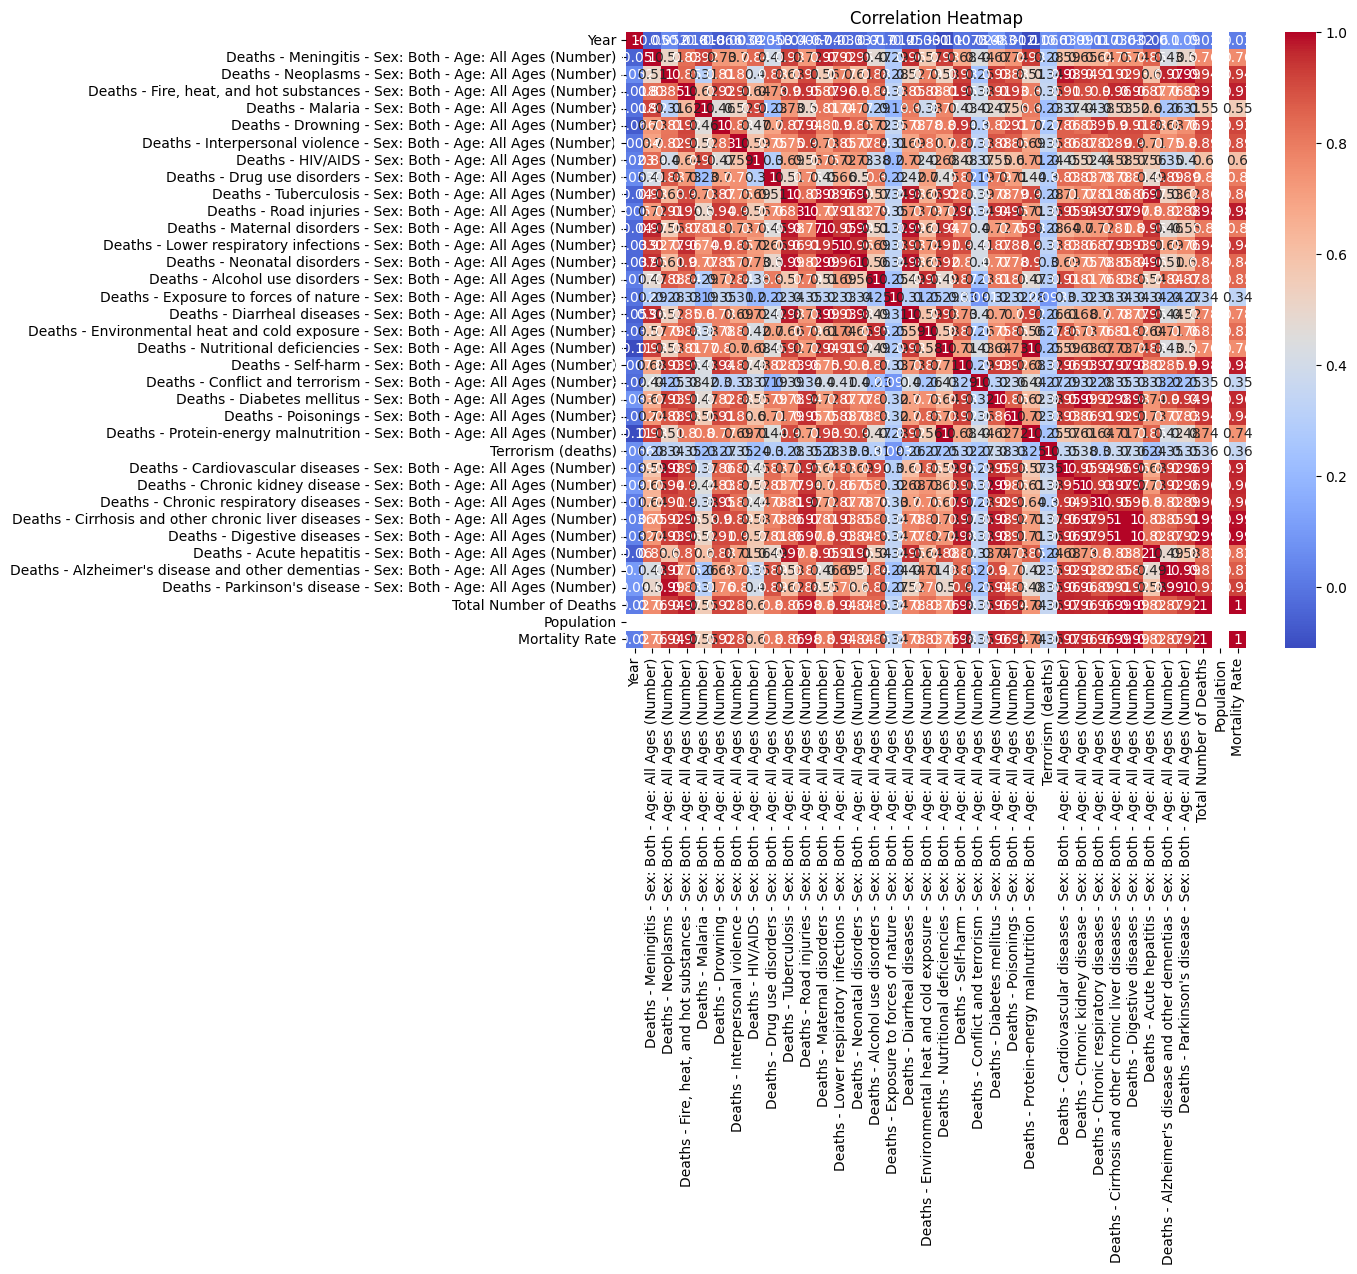

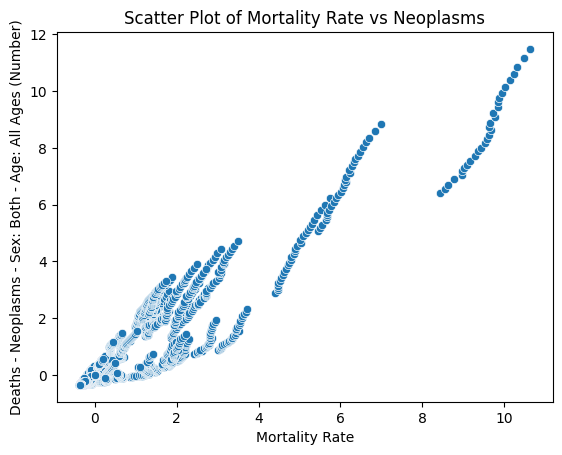

In [31]:
# Step 6: Plot correlations using a heatmap

# Select only the numerical columns for the heatmap
numerical_columns = df_scaled.select_dtypes(include=['float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Scatter plot for relationships between variables
# Assuming the column name is corrected for the scatter plot

sns.scatterplot(data=df_scaled, x='Mortality Rate', y='Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)')
plt.title('Scatter Plot of Mortality Rate vs Neoplasms')
plt.show()


Principal Component Analysis (PCA)

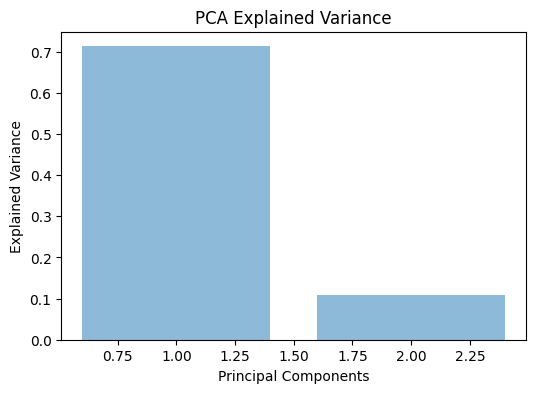

        PC1       PC2
0 -1.520909  0.136999
1 -1.536890  0.114636
2 -1.551287  0.098989
3 -1.520963  0.064938
4 -1.384611  0.000101


In [20]:
# Step 8: Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Select only the numerical columns for PCA
numerical_columns = df_scaled.select_dtypes(include=['float64']).columns

pca = PCA(n_components=2)  # Select number of principal components
pca_result = pca.fit_transform(df_scaled[numerical_columns])

# Visualize the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# PCA results as dataframe
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(pca_df.head())


Clustering: K-Means Clustering

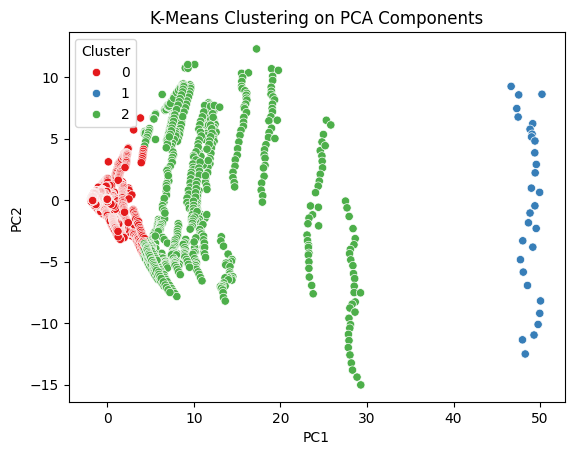

In [22]:
# Step 9: Apply K-Means Clustering
from sklearn.cluster import KMeans

# Select only the numerical columns for K-Means
numerical_columns = df_scaled.select_dtypes(include=['float64']).columns

kmeans = KMeans(n_clusters=3)  # Experiment with different K values
clusters = kmeans.fit_predict(df_scaled[numerical_columns])

# Add the clusters to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Means Clustering on PCA Components')
plt.show()


Regression: Linear Regression for Mortality Rate Prediction

In [24]:
# Step 10: Define features and target variable
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['Mortality Rate'])
y = df_scaled['Mortality Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model Evaluation: Cross-Validation

Columns in df_scaled: ['Year', 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)', 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)', 'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)', 'Deaths - Malaria - Sex: Both - Age: All Ages (Number)', 'Deaths - Drowning - Sex: Both - Age: All Ages (Number)', 'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)', 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)', 'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)', 'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)', 'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)', 'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)', 'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)', 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)', 'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)', 'Deaths - Exposure to forces of nature - Sex: B

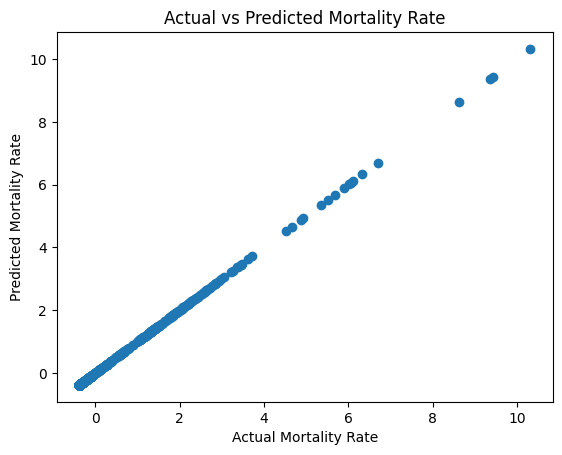

In [28]:
import pandas as pd
import numpy as np

# Check the columns in df_scaled
print("Columns in df_scaled:", df_scaled.columns.tolist())

# Step 10: Define features and target variable
columns_to_drop = ['Mortality Rate', 'Country', 'Entity', 'Code']
existing_columns = [col for col in columns_to_drop if col in df_scaled.columns]
X = df_scaled.drop(columns=existing_columns)  # Drop only existing non-numeric columns
y = df_scaled['Mortality Rate']  # Target variable

# Convert to numeric and handle errors
X = X.apply(pd.to_numeric, errors='coerce')

# Check for NaN values created due to conversion
print("NaN values in features after conversion:\n", X.isna().sum())

# Option 1: Drop rows with NaN values
X = X.dropna()
y = y[X.index]  # Align y with the cleaned X

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Train a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mortality Rate')
plt.ylabel('Predicted Mortality Rate')
plt.title('Actual vs Predicted Mortality Rate')
plt.show()


Save Processed Data (Optional)

In [29]:
# Step 12: Cross-validation for Linear Regression
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-np.mean(cv_scores)}")


Cross-validated MSE: 2.6330297167287268e-28


Summary and Documentation

In [30]:
# Step 13: Save the cleaned and processed data to a new CSV file
df_cleaned.to_csv('./processed_mortality_data.csv', index=False)

# Summarize the results
summary = {
    'Mean Squared Error': mse,
    'R-squared': r2,
    'Cross-validated MSE': -np.mean(cv_scores)
}
print("Model Summary:", summary)


Model Summary: {'Mean Squared Error': 1.6146683655884387e-30, 'R-squared': 1.0, 'Cross-validated MSE': 2.6330297167287268e-28}
